In [ ]:
#for loading data and for performing data analysis operations on it
import pandas as pd
import numpy as np

#for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

#for PCA (feature engineering)
from sklearn.decomposition import PCA

#for data scaling
from sklearn.preprocessing import StandardScaler

#for splitting dataset
from sklearn.model_selection import train_test_split

#for fitting SVM model
from sklearn.svm import SVC

#for displaying evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#for file operations
import os

print("All required libraries loaded!")

All required libraries loaded!


In [ ]:
#load dataset into pandas dataframe
df = pd.read_csv("/content/data.csv")
df.shape

FileNotFoundError: ignored

In [ ]:
#check the data types of all the attributes loaded into the dataframe
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#see first few rows of the data loaded
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#see last few rows of the data loaded
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
#loading the predictors into dataframe 'X'
#NOTE: we are not choosing columns - 'id', 'diagnosis', 'Unnamed:32'
X = df.iloc[:,2:32]
print(X.shape)
X.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#loading target values into dataframe 'y'
y = df.diagnosis
print(y.shape)
y.head()

(569,)


0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [ ]:
#coverting categorical data to numerical data
y_num = pd.get_dummies(y)
y_num.tail()

,B,M
564,0,1
565,0,1
566,0,1
567,0,1
568,1,0


In [ ]:
#use only one column for target value
y = y_num.M
print(y.shape)
y.tail()

(569,)


564    1
565    1
566    1
567    1
568    0
Name: M, dtype: uint8

In [ ]:
#call corr() on dataframe X
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

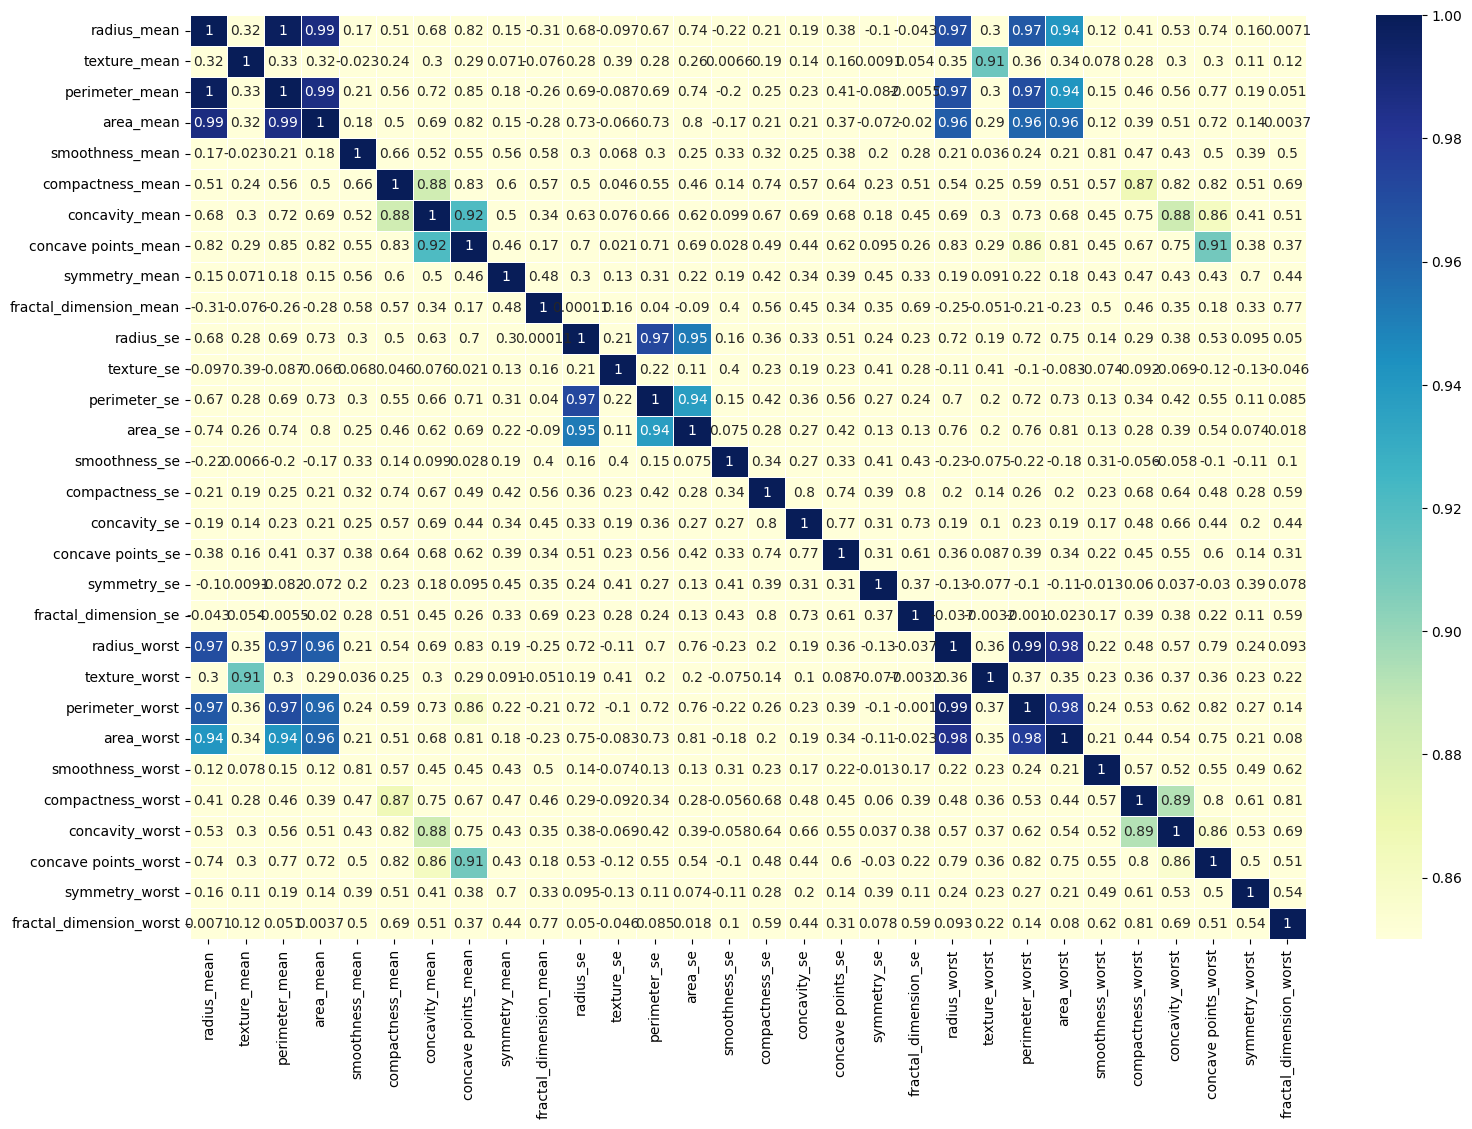

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(X.corr(), vmin=0.85, vmax=1, annot=True, cmap='YlGnBu', linewidths=.5)

In [ ]:
#reducing the attributes in X dataframe

#1 scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#2 drop the highly correlated columns which are not useful i.e., area, perimeter, perimeter_worst, area_worst, perimeter_se, area_se 
X_scaled = pd.DataFrame(X_scaled)
X_scaled_drop = X_scaled.drop(X_scaled.columns[[2, 3, 12, 13, 22, 23]], axis=1)

#3 apply PCA on scaled data
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_scaled_drop)
x_pca = pd.DataFrame(x_pca)

print("Before PCA, X dataframe shape = ",X.shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape)

Before PCA, X dataframe shape =  (569, 30) 
After PCA, x_pca dataframe shape =  (569, 11)


In [ ]:
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.sum())

[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.9602558201892889


In [ ]:
#combine PCA data and target data

#1 set column names for the dataframe
colnames = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']

#target data
diag = df.iloc[:,1:2]

#combine PCA and target data
Xy = pd.DataFrame(np.hstack([x_pca,diag.values]),columns=colnames)

Xy.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,diagnosis
0,8.066802,0.414765,-2.538073,-2.608014,-1.344494,1.435172,-1.713811,-0.491329,0.655096,0.544224,0.718321,M
1,0.106798,-2.761727,-0.141345,-1.395074,0.130814,0.017362,-0.333451,-0.389474,-0.706687,0.114084,0.405121,M
2,4.386099,-1.969883,-0.226679,-1.108399,-0.700594,0.477506,0.287285,-0.079434,-0.35264,-0.654396,-0.284427,M
3,10.670616,5.914865,-4.302831,1.998226,-1.846898,3.101734,-0.812473,-1.813327,1.334007,-0.454319,-1.428596,M
4,2.03748,-1.154659,0.905585,-3.346186,-0.640128,-1.333159,0.604286,-0.462435,-0.232974,0.37583,0.567374,M


In [ ]:
X=(Xy.iloc[:,0:11]).values
#75:25 train:test data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
print("X_test shape ",X_test.shape)
print("y_test shape ",y_test.shape)

X_train shape  (426, 11)
y_train shape  (426,)
X_test shape  (143, 11)
y_test shape  (143,)


In [ ]:
#model fitting
svc = SVC()
svc.fit(X_train, y_train)

NameError: ignored

In [ ]:
#predict values
y_pred_svc =svc.predict(X_test)
y_pred_svc.shape

(143,)

In [ ]:
#print confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[89  1]
 [ 4 49]]


In [ ]:
#print classification report
creport = classification_report(y_test, y_pred_svc)
print("Classification report:\n",creport)

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Define number of folds for k-fold cross-validation
k = 10
# Define number of iterations for many k-fold cross-validation
n_iter = 1
# Initialize list to store accuracies
accuracies = []

# Loop over each iteration of k-fold cross-validation
for n in range(n_iter):
    # Shuffle indices of data
    indices = np.random.permutation(len(X))
    # Split data into k folds
    fold_size = len(X) // k
    folds_X = [X[indices[i*fold_size:(i+1)*fold_size]] for i in range(k)]
    folds_y = [y[indices[i*fold_size:(i+1)*fold_size]] for i in range(k)]
   
    # Loop over each fold and train SVM model using remaining folds as training set
    fold_accuracies = []
    for i in range(k):
        # Select current fold as validation set and concatenate remaining folds as training set
        X_train = np.concatenate([fold for j, fold in enumerate(folds_X) if j != i])
        y_train = np.concatenate([fold for j, fold in enumerate(folds_y) if j != i])
        X_val = folds_X[i]
        y_val = folds_y[i]
       
        # Train SVM model on training set
        svm = SVC(kernel='linear')
        svm.fit(X_train, y_train)
       
        # Evaluate SVM model on validation set
        y_pred = svm.predict(X_val)
        accuracy = sum(y_pred == y_val) / len(y_val)
        fold_accuracies.append(accuracy)
   
    # Compute and store overall accuracy for current iteration
    overall_accuracy = sum(fold_accuracies) / k
    accuracies.append(overall_accuracy)

# Print accuracies for each iteration and compute mean and standard deviation
print(f"Accuracies for {n_iter} iterations of {k}-fold cross-validation: {accuracies}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}")
print(f"Standard deviation: {np.std(accuracies):.2f}")


Accuracies for 1 iterations of 10-fold cross-validation: [0.95]
Mean accuracy: 0.95
Standard deviation: 0.00
